In [1]:
model_name = 'ProsusAI/finbert'

use the model FinBERT, https://huggingface.co/ProsusAI/finbert

In [2]:
from transformers import BertForSequenceClassification

/Users/iris/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
model = BertForSequenceClassification.from_pretrained(model_name)

initialize the model and the tokenizer

In [6]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(model_name)

following steps:
1. Tokenize
2. Token IDs -> model
3. Model activations -> probabilities (using Softmax)
4. Argmax of those probs

In [4]:
txt = ("Given the recent downturn in stocks especially in tech which is likely to persist as yields keep going up, "
       "I thought it would be prudent to share the risks of investing in ARK ETFs, written up very nicely by "
       "[The Bear Cave](https://thebearcave.substack.com/p/special-edition-will-ark-invest-blow). The risks comes "
       "primarily from ARK's illiquid and very large holdings in small cap companies. ARK is forced to sell its "
       "holdings whenever its liquid ETF gets hit with outflows as is especially the case in market downturns. "
       "This could force very painful liquidations at unfavorable prices and the ensuing crash goes into a "
       "positive feedback loop leading into a death spiral enticing even more outflows and predatory shorts.")

txt

"Given the recent downturn in stocks especially in tech which is likely to persist as yields keep going up, I thought it would be prudent to share the risks of investing in ARK ETFs, written up very nicely by [The Bear Cave](https://thebearcave.substack.com/p/special-edition-will-ark-invest-blow). The risks comes primarily from ARK's illiquid and very large holdings in small cap companies. ARK is forced to sell its holdings whenever its liquid ETF gets hit with outflows as is especially the case in market downturns. This could force very painful liquidations at unfavorable prices and the ensuing crash goes into a positive feedback loop leading into a death spiral enticing even more outflows and predatory shorts."

In [7]:
tokens = tokenizer.encode_plus(txt,max_length=512,
                               truncation=True,
                               padding= 'max_length',
                               add_special_tokens=True,
                               return_tensors='pt')

token and ID:

[CLS] = 101
[SEP] = 102
[MASK] = 103
[UNK] = 100
[PAD] = 0

In [8]:
tokens

{'input_ids': tensor([[  101,  2445,  1996,  3522,  2091, 22299,  1999, 15768,  2926,  1999,
          6627,  2029,  2003,  3497,  2000, 29486,  2004, 16189,  2562,  2183,
          2039,  1010,  1045,  2245,  2009,  2052,  2022, 10975, 12672,  3372,
          2000,  3745,  1996, 10831,  1997, 19920,  1999, 15745,  3802, 10343,
          1010,  2517,  2039,  2200, 19957,  2011,  1031,  1996,  4562,  5430,
          1033,  1006, 16770,  1024,  1013,  1013,  1996,  4783,  2906, 27454,
          1012,  4942,  9153,  3600,  1012,  4012,  1013,  1052,  1013,  2569,
          1011,  3179,  1011,  2097,  1011, 15745,  1011, 15697,  1011,  6271,
          1007,  1012,  1996, 10831,  3310,  3952,  2013, 15745,  1005,  1055,
          5665, 18515, 21272,  1998,  2200,  2312,  9583,  1999,  2235,  6178,
          3316,  1012, 15745,  2003,  3140,  2000,  5271,  2049,  9583,  7188,
          2049,  6381,  3802,  2546,  4152,  2718,  2007,  2041, 12314,  2015,
          2004,  2003,  2926,  1996,  

In [9]:
output = model(**tokens)

In [10]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.8200,  2.4484,  0.0216]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [11]:
output[0]

tensor([[-1.8200,  2.4484,  0.0216]], grad_fn=<AddmmBackward0>)

using PyTorch, softmax function

In [14]:
import torch.nn.functional as F

In [16]:
F.softmax(output[0], dim=-1)

tensor([[0.0127, 0.9072, 0.0801]], grad_fn=<SoftmaxBackward0>)

In [17]:
probs = F.softmax(output[0], dim=-1)

In [18]:
probs

tensor([[0.0127, 0.9072, 0.0801]], grad_fn=<SoftmaxBackward0>)

do prediction

In [21]:
import torch

In [22]:
pred = torch.argmax(probs)

In [23]:
pred.item()

1

1. getting data via the Kaggle API
2. input pipeline for TensorFlow
3. build and train model
4. make prediction

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [24]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 985.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102975 sha256=97ab9d7788bba85f8820906f2d2dd3b0d7aebbc2b43ef96ce2bbb007d4806f67
  Stored in directory: /Users/iris/Library/Caches/pip/wheels/f3/eb/e9/819c2d9eac90204eec8579430759f75a1d6dbe4cd0b93f53bc
Successfully built kaggle


In [1]:
import kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()

In [4]:
api.authenticate()

In [9]:
# api.competition_download_file('sentiment-analysis-on-movie-reviews','test.tsv.zip',path='./')
# api.competition_download_file('sentiment-analysis-on-movie-reviews','train.tsv.zip',path='./')


In [38]:
pip install --upgrade kaggle


Note: you may need to restart the kernel to use updated packages.


In [8]:
# api.competition_download_file('sentiment-analysis-on-movie-reviews','test.tsv.zip',path='./')

In [43]:
from kaggle import api




In [6]:
api.competition_download_file('sentiment-analysis-on-movie-reviews', 'test.tsv.zip', path='./')


100%|██████████| 494k/494k [00:00<00:00, 926kB/s]

In [7]:
api.competition_download_file('sentiment-analysis-on-movie-reviews', 'train.tsv.zip', path='./')

100%|██████████| 1.28M/1.28M [00:01<00:00, 1.06MB/s]

In [10]:
import zipfile

In [11]:
with zipfile.ZipFile('./test.tsv.zip','r') as zipref:
    zipref.extractall('./')

In [12]:
with zipfile.ZipFile('./train.tsv.zip','r') as zipref:
    zipref.extractall('./')

In [13]:
import pandas as pd

In [15]:
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


phrase column: text data to be processed

In [17]:
df.drop_duplicates(subset=['SentenceId'], keep='first')

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1
...,...,...,...,...
155984,155985,8540,... either you 're willing to go with this cla...,2
155997,155998,8541,"Despite these annoyances , the capable Claybur...",2
156021,156022,8542,-LRB- Tries -RRB- to parody a genre that 's al...,1
156031,156032,8543,The movie 's downfall is to substitute plot fo...,1


<Axes: xlabel='Sentiment'>

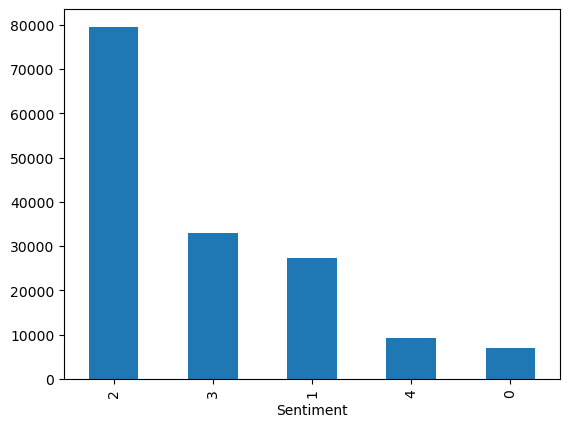

In [18]:
df['Sentiment'].value_counts().plot(kind='bar')

The sentiment labels:
0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

tokenize the text

In [19]:
seq_len = 512
num_samples = len(df)

num_samples, seq_len

(156060, 512)

number of samples: 156060
number of tokens: 512

In [20]:
from transformers import BertTokenizer

initialize tokenizer

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [22]:
tokens = tokenizer(df['Phrase'].tolist(), max_length=seq_len,
                   truncation=True, padding='max_length',
                   add_special_tokens=True,
                   return_tensors='np')

In [23]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [24]:
tokens['input_ids']

array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101, 22572, 12148, ...,     0,     0,     0]])

it shows classified tokens at the start: 101
sequences and padding tokens

In [25]:
tokens['attention_mask']

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

it shows 1 and 0

save these arrays as numpy binary files

In [26]:
import numpy as np

In [27]:
with open('movie-xids.npy', 'wb') as f:
    np.save(f,tokens['input_ids'])
with open('movie-xmask.npy','wb') as f:
    np.save(f,tokens['attention_mask'])

extract sentiment column

In [28]:
arr = df['Sentiment'].values

In [29]:
arr.shape

(156060,)

In [30]:
arr

array([1, 2, 2, ..., 3, 2, 2])

In [31]:
arr.max()+1

5

if have label two, and then encode it:

2 = [0,0,1,0,0]
4 = [0,0,0,1,0]

initialze a zero array
call it labels, numpy, zeros

In [32]:
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

(156060, 5)

In [33]:
labels

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [34]:
labels[np.arange(num_samples), arr] =1

In [35]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [36]:
with open('movie-labels.npy','wb') as f:
    np.save(f,labels)

build dataset, build TensorFlow input pipleline

In [37]:
import numpy as np

In [38]:
with open('movie-xids.npy','rb') as f:
    Xids = np.load(f, allow_pickle=True)

In [39]:
with open('movie-xmask.npy','rb') as f:
    Xmask = np.load(f, allow_pickle=True)

In [45]:
with open('movie-labels.npy','rb') as f:
    labels = np.load(f, allow_pickle=True)

In [42]:
Xids

array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101, 22572, 12148, ...,     0,     0,     0]])

In [43]:
Xids.shape

(156060, 512)

In [46]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [47]:
import tensorflow as tf

In [49]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [50]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [56]:
{input_ids, attention_mask}, outputs

NameError: name 'input_ids' is not defined

In [60]:
def map_func(input_ids, masks, labels):
    return {'input_ids':input_ids,
            'attention_mask':masks}, labels

In [61]:
dataset = dataset.map(map_func)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__map_func() missing 1 required positional argument: 'labels'


In [59]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int64, name=None)}, TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

create TensorFlow dataset object

shuffle data and batch it

In [62]:
batch_size = 16

In [63]:
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True)

In [64]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))>

In [65]:
split = 0.9

In [66]:
Xids.shape[0]

156060

In [67]:
Xids.shape[0]/batch_size

9753.75

In [68]:
int((Xids.shape[0]/batch_size) * split)

8778

In [69]:
size = int((Xids.shape[0]/batch_size) * split)

In [70]:
train_ds=dataset.take(size)
val_ds=dataset.skip(size)

In [71]:
tf.data.experimental.save(train_ds, 'train')
tf.data.experimental.save(val_ds,'val')

Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


In [72]:
train_ds.element_spec

({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

In [73]:
val_ds.element_spec

({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

In [74]:
train_ds.element_spec == val_ds.element_spec

True

In [75]:
ds = tf.data.experimental.load('train', element_spec=train_ds.element_spec)

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


In [76]:
ds.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))>

build model architecture for sentiment classification

initialize the Bert model, using TF auto model from pre-trained

In [82]:
from transformers import TFAutoModel

In [4]:
bert = TFAutoModel.from_pretrained('bert-base-cased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [5]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108310272 (413.17 MB)
Trainable params: 108310272 (413.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1]:
from transformers import TFAutoModel


In [3]:
from tensorflow.keras.models import Model


pooled activations are 2D tensors

In [6]:
import tensorflow as tf

two inputs

In [7]:
input_ids = tf.keras.layers.Input(shape=(512,),
                                  name='input_ids',dtype='int32')
mask = tf.keras.layers.Input(shape=(512,),
                                  name='attention_mask',dtype='int32')

transformer

In [15]:
embeddings = bert.bert(input_ids, attention_mask=mask)[1]

classifier head

In [14]:
x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(x)

In [10]:
from tensorflow.keras import Input


In [11]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
inputs = tokenizer("Hello, world!", return_tensors="tf")
input_ids = inputs["input_ids"]
mask = inputs["attention_mask"]


tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [12]:
from transformers import TFAutoModel

bert = TFAutoModel.from_pretrained('bert-base-cased')


outputs = bert(input_ids=input_ids, attention_mask=mask)


embeddings = outputs[1]  


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [28]:
import tensorflow as tf
from transformers import TFAutoModel, BertTokenizer


input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name='attention_mask')


bert_model = TFAutoModel.from_pretrained('bert-base-cased')


bert_outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)



model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=outputs)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_6' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_6' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [27]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

ValueError: Unrecognized type for `outputs`: [[0.1500378  0.19578391 0.3150366  0.24438477 0.09475695]] (of type <class 'tensorflow.python.framework.ops.EagerTensor'>)

In [26]:
model.summary()

NameError: name 'model' is not defined

In [25]:
import tensorflow as tf

input_ids = tf.keras.Input(shape=(None,), dtype='int32', name='input_ids')
mask = tf.keras.Input(shape=(None,), dtype='int32', name='attention_mask')


bert = TFAutoModel.from_pretrained('bert-base-cased')
bert_output = bert(input_ids, attention_mask=mask)


y = bert_output[0]  


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_5' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_5' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [22]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)


ValueError: Unrecognized type for `outputs`: [[0.1500378  0.19578391 0.3150366  0.24438477 0.09475695]] (of type <class 'tensorflow.python.framework.ops.EagerTensor'>)

In [23]:
import tensorflow as tf
from transformers import TFAutoModel, BertTokenizer

 
input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name='attention_mask')

 
bert_model = TFAutoModel.from_pretrained('bert-base-cased')

 
outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)

 
y = outputs.last_hidden_state

 
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_4' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_4' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
example = tokenizer("Testing the BERT model.", return_tensors="tf")
bert_output = bert_model(example['input_ids'], attention_mask=example['attention_mask'])
print(bert_output.last_hidden_state)


tf.Tensor(
[[[ 0.09365723  0.0995256  -0.06050768 ... -0.16746983  0.27449405
   -0.0958368 ]
  [ 0.24421787 -0.11154351  0.5590989  ... -0.25736088  0.07066885
    0.20786303]
  [ 0.23000246  0.01287152  0.1385987  ...  0.07103999  0.08163989
    0.02318791]
  ...
  [ 0.30151787  0.02781061  0.03054495 ...  0.16898547  0.03820023
    0.01034464]
  [-0.09027284  0.04579119  0.19450107 ... -0.06552316  0.25364813
   -0.17275922]
  [ 0.53403157  0.628784   -0.00852468 ... -0.17854846  0.88687205
   -0.93741596]]], shape=(1, 9, 768), dtype=float32)


In [29]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer


input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name='attention_mask')


bert_model = TFBertModel.from_pretrained('bert-base-cased')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [31]:

outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)


pooled_output = outputs.pooler_output




ValueError: Exception encountered when calling layer 'tf_bert_model_7' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_7' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [32]:
# Create the Keras model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[pooled_output, last_hidden_state])


NameError: name 'pooled_output' is not defined